In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random

# Perfect Numbers

` is_perfect(num)` returns `True` if `num` is perfect number

In [2]:
# helper function creates list of divisors
def divisor(num):
    if num == 1:
        return [1]
    divs = [1,num]
    for i in range(2, int(math.sqrt(num)+1)):
        if num % i == 0:
            divs.append(i)
            if i*i != num:
                divs.append(num//i)
    return sorted(divs)

def  is_perfect(num):
    div = divisor(num)
    div_sum = sum(n for n in div if n != num)
    return num == div_sum
    

`perfect_nums(maxnum)` returns a list of the perfect numbers amoung the furst `maxnum` positive integer

In [3]:
def perfect_nums(maxnum):
    return [i for i in range(maxnum+1) if is_perfect(i)]

# Mersenne Primes

`is_mersenne(num)` returns `True` if `num` is a Mersenne prime, assuming `num` is a positive integer

In [4]:
#helper function to check if number is prime
def is_prime(num):
    if num == 1 or num == 0 :
        return False
    for i in range(2, int(math.sqrt(num))+1):
        if num % i == 0:
            return False
    return True

def is_mersenne(num):
    result = 2**num - 1  
    return  is_prime(result) and is_prime(num)

`mersenne_primes(nprimes)` checks the first `nprime` prime numbers and returns a list of the primes p such that p is a Meresenne prime

In [5]:
#helper function creates list of first nprimes
def prime_lst(num):
    ct = 0
    primes = []
    while len(primes)!= num: # loops until num primes are in lst 
        ct+=1 
        if is_prime(ct): # adds count to list if prime
            primes.append(ct)
    return primes

def mersenne_primes(nprimes):
    mprimes_lst = prime_lst(nprimes)
    return[i for i in mprimes_lst if is_mersenne(i)]

# An Ace and Two Deuces

`guess_ace(strategy)` simulates card game

In [6]:
def guess_ace(strategy):
    cards = [2,2,2]
    ace_position = random.randint(0,2)# chooses postion of Ace
    initial_guess = random.randint(0,2)
    cards[ace_position]='A'
    print(f'Your initial guess: Card {initial_guess+1}')
    if strategy == 'stay':
        print('You decide to stay.')
        print(f"Monty's cards:{cards[0]} {cards[1]} {cards[2]}" )
        if initial_guess == ace_position:
            print('Skiing this weekend!')
        else:
            print('No skiing this weekend')
    elif strategy == 'switch':
        print('You decide to switch.')
        print(f"Monty's cards:{cards[0]} {cards[1]} {cards[2]}")
        if initial_guess != ace_position:
            print('Skiing this weekend!')
        else:
            print('No skiing this weekend')           

# Dice Sums

`dice_sum_sim(ndice, nsim)` simulates rolling of `ndice` dice and returns list of probalilities of rolling each sum

In [7]:
# helper function simulates roll of ndice and finds sum
def roll_sum(ndice):
    return sum(random.randint(1,6)for i in range(ndice))   
# helper function creates dictionary of sums and their frequency
def roll_dict(ndice, nsim):
    roll_sumlst = [roll_sum(ndice) for i in range(nsim)]
    dict_roll = {i:roll_sumlst.count(i) for i in range(ndice,6*ndice+1) }
    return dict_roll

def dice_sum_sim(ndice, nsim):
    freq_dict = roll_dict(ndice, nsim)
    freq = list(freq_dict.values())
    prob = [f/nsim for f in freq]
    return prob


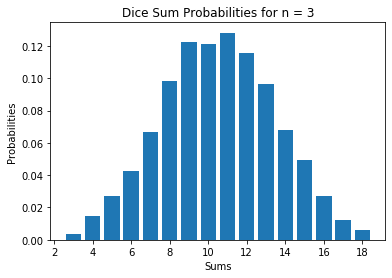

In [8]:
prob3 = dice_sum_sim(3, 10000)
sums_dict = roll_dict(3, 10000)
sums = list(sums_dict.keys())
plt.bar(sums,prob3)
plt.xlabel("Sums")
plt.ylabel("Probabilities")
plt.title("Dice Sum Probabilities for n = 3")
plt.show()